In [48]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn import metrics

In [13]:
car = pd.read_csv('car data.csv')

In [14]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
car.shape

(301, 9)

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [25]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [26]:
print(car.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [28]:
print(car.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [29]:
print(car.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [30]:
car.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2 }}, inplace=True)

In [31]:
car.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }}, inplace=True)

In [32]:
car.replace({'Transmission':{'Manual':0, 'Automatic':1 }}, inplace=True)

In [33]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [34]:
X = car.drop(['Car_Name', 'Selling_Price'],axis=1)
Y = car['Selling_Price']

In [35]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [36]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2 )

In [65]:
model = LinearRegression()

In [70]:
model.fit(X_train,Y_train)

LinearRegression()

In [71]:
training_data_prediction = model.predict(X_train)

In [41]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8799451660493698


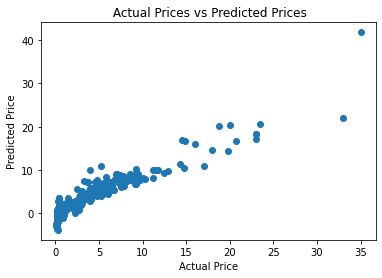

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [76]:
test_data_prediction = model.predict(X_test)

In [44]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8365766715026905


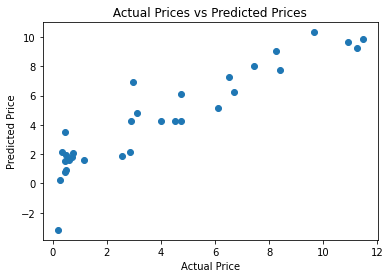

In [45]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices ")
plt.show()

In [77]:
predictions = model.predict(X_test)
predictions

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [80]:
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [10]:
car.info()

NameError: name 'car' is not defined

NameError: name 'car' is not defined